In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix, classification_report

In [7]:

# Load the red wine quality dataset
df = pd.read_csv(r"C:\Users\rohit\Desktop\CHINTA_SRI_DURGA_ROHIT-ML-LAB\wine+quality\winequality-red.csv", sep =";")

# View basic structure
print(df.head())
print(df.info())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [8]:
# Check for missing values
print(df.isnull().sum())

# Dataset has no missing values; otherwise we would handle them here
# Remove duplicate rows if any
df = df.drop_duplicates()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:

# Separate features and target (Regression)
X = df.drop("quality", axis=1)
y_reg = df["quality"]

# Create binary target for Logistic Regression
# Good wine = quality >= 6
y_clf = (df["quality"] >= 6).astype(int)

X_train, X_test, y_reg_train, y_reg_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

_, _, y_clf_train, y_clf_test = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

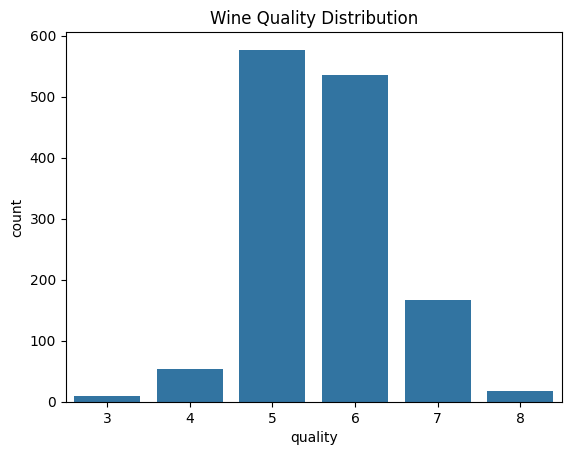

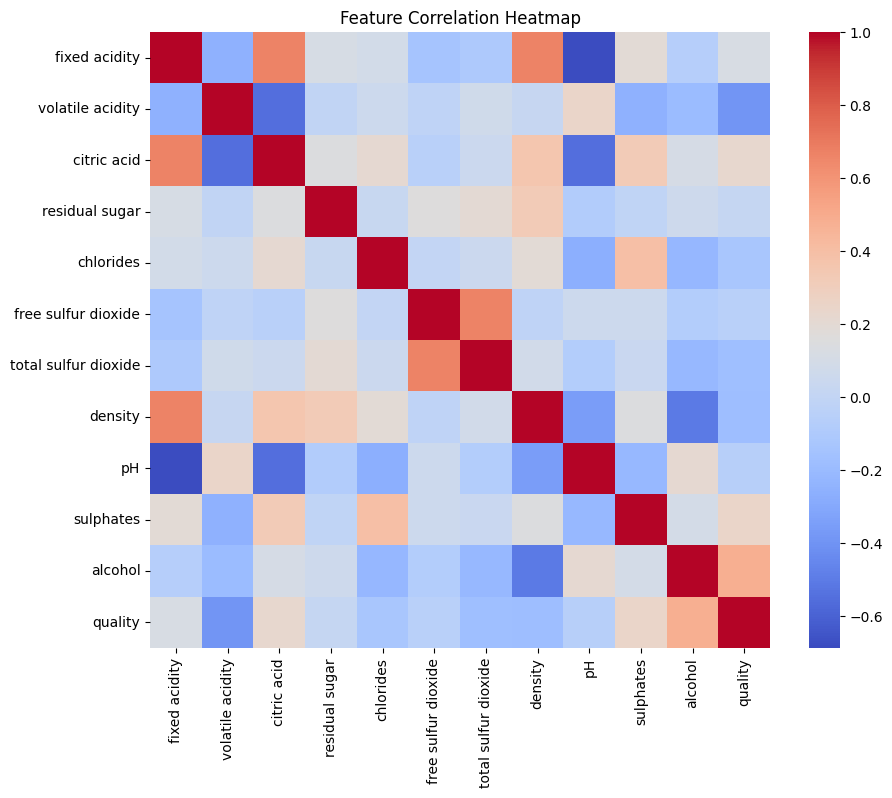

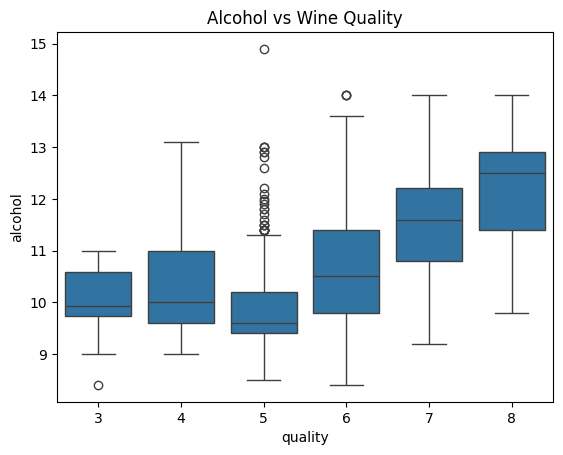

In [10]:

# DATA VISUALIZATION & EDA

# Distribution of target
sns.countplot(x="quality", data=df)
plt.title("Wine Quality Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Alcohol vs Quality
sns.boxplot(x="quality", y="alcohol", data=df)
plt.title("Alcohol vs Wine Quality")
plt.show()

In [11]:

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_reg_train)

y_reg_pred = lin_reg.predict(X_test_scaled)

mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg_test, y_reg_pred)

print("LINEAR REGRESSION RESULTS")
print("MSE :", mse)
print("RMSE:", rmse)
print("R2  :", r2)

LINEAR REGRESSION RESULTS
MSE : 0.4310090050900972
RMSE: 0.656512760797608
R2  : 0.3915360499058188


In [12]:

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_clf_train)

y_clf_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_clf_test, y_clf_pred)
conf_matrix = confusion_matrix(y_clf_test, y_clf_pred)

print("\nLOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_clf_test, y_clf_pred))



LOGISTIC REGRESSION RESULTS
Accuracy: 0.7647058823529411

Confusion Matrix:
 [[101  34]
 [ 30 107]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       135
           1       0.76      0.78      0.77       137

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272

